# Import Libraries

In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare and clean dataset

## Concatenate data

In [2]:
# Initialize an empty list to store DataFrames
dfs = []

# Iterate through all files in the "data" folder
for file in os.listdir('data'):
    if file.endswith('.csv'):
        # Read the CSV file into a DataFrame
        df = pd.read_csv(os.path.join('data', file))
        
        # Add the "time" column
        if 'weekends' in file:
            df['time'] = 'weekends'
        elif 'weekdays' in file:
            df['time'] = 'weekdays'
        
        # Add the "city" column
        city = file[:-13] # Remove the last 13 characters from the file name
        df['city'] = city
        
        # Append the DataFrame to the list
        dfs.append(df)

# Concatenate all DataFrames together
final_df = pd.concat(dfs, ignore_index=True)

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'data'

In [3]:
final_df.sample(5)

NameError: name 'final_df' is not defined

In [10]:
final_df.shape

(51707, 22)

In [15]:
# put final_df into a csv file
final_df.to_csv('all_data.csv', index=False)

## Check for missing values

In [ ]:
df = pd.read_csv('all_data.csv', sep=',') # dataframe from the csv

In [3]:
missing_data = df.isnull().sum()
print(missing_data)

Unnamed: 0                    0
realSum                       0
room_type                     0
room_shared                   0
room_private                  0
person_capacity               0
host_is_superhost             0
multi                         0
biz                           0
cleanliness_rating            0
guest_satisfaction_overall    0
bedrooms                      0
dist                          0
metro_dist                    0
attr_index                    0
attr_index_norm               0
rest_index                    0
rest_index_norm               0
lng                           0
lat                           0
time                          0
city                          0
dtype: int64


## Check for duplicates

In [4]:
duplicate_rows = df.duplicated().sum()
print(f'There are {duplicate_rows} duplicate rows in the dataset.')

There are 0 duplicate rows in the dataset.


## Remove outliers

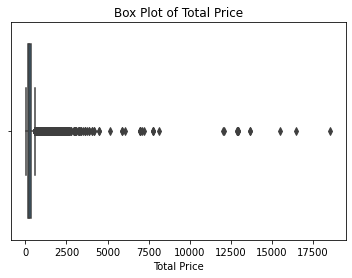

In [19]:
sns.boxplot(x='realSum', data=df)
plt.title('Box Plot of Total Price')
plt.xlabel('Total Price')
plt.show()

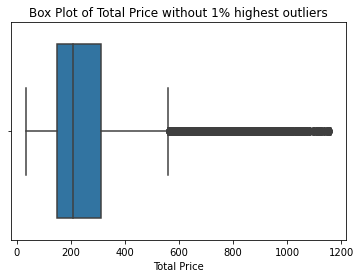

In [14]:
# Remove the outliers in the "realSum" column by removing 1% highets values
df_clean = df[df['realSum'] < df['realSum'].quantile(0.99)]
sns.boxplot(x='realSum', data=df_clean)
plt.title('Box Plot of Total Price without 1% highest outliers')
plt.xlabel('Total Price')
plt.show()

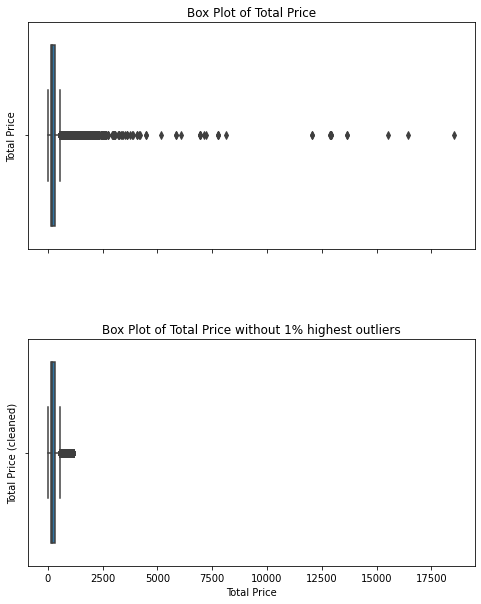

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a 2x1 subplot grid with shared x-axis and adjusted vertical spacing
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(8, 10), gridspec_kw={'hspace': 0.4})

# Plot the first boxplot
sns.boxplot(x='realSum', data=df, ax=ax1)
ax1.set_title('Box Plot of Total Price')
ax1.set_xlabel('')  # Remove x-axis label since it's shared
ax1.set_ylabel('Total Price')

# Remove the outliers in the "realSum" column by removing 1% highest values
df_clean = df[df['realSum'] < df['realSum'].quantile(0.99)]

# Plot the second boxplot
sns.boxplot(x='realSum', data=df_clean, ax=ax2)
ax2.set_title('Box Plot of Total Price without 1% highest outliers')
ax2.set_xlabel('Total Price')
ax2.set_ylabel('Total Price (cleaned)')

# Show the combined figure
plt.show()


## Check Consistency

In [6]:
print(df['room_type'].unique())

['Private room' 'Entire home/apt' 'Shared room']


# Classic EDA

In [21]:
df = df_clean

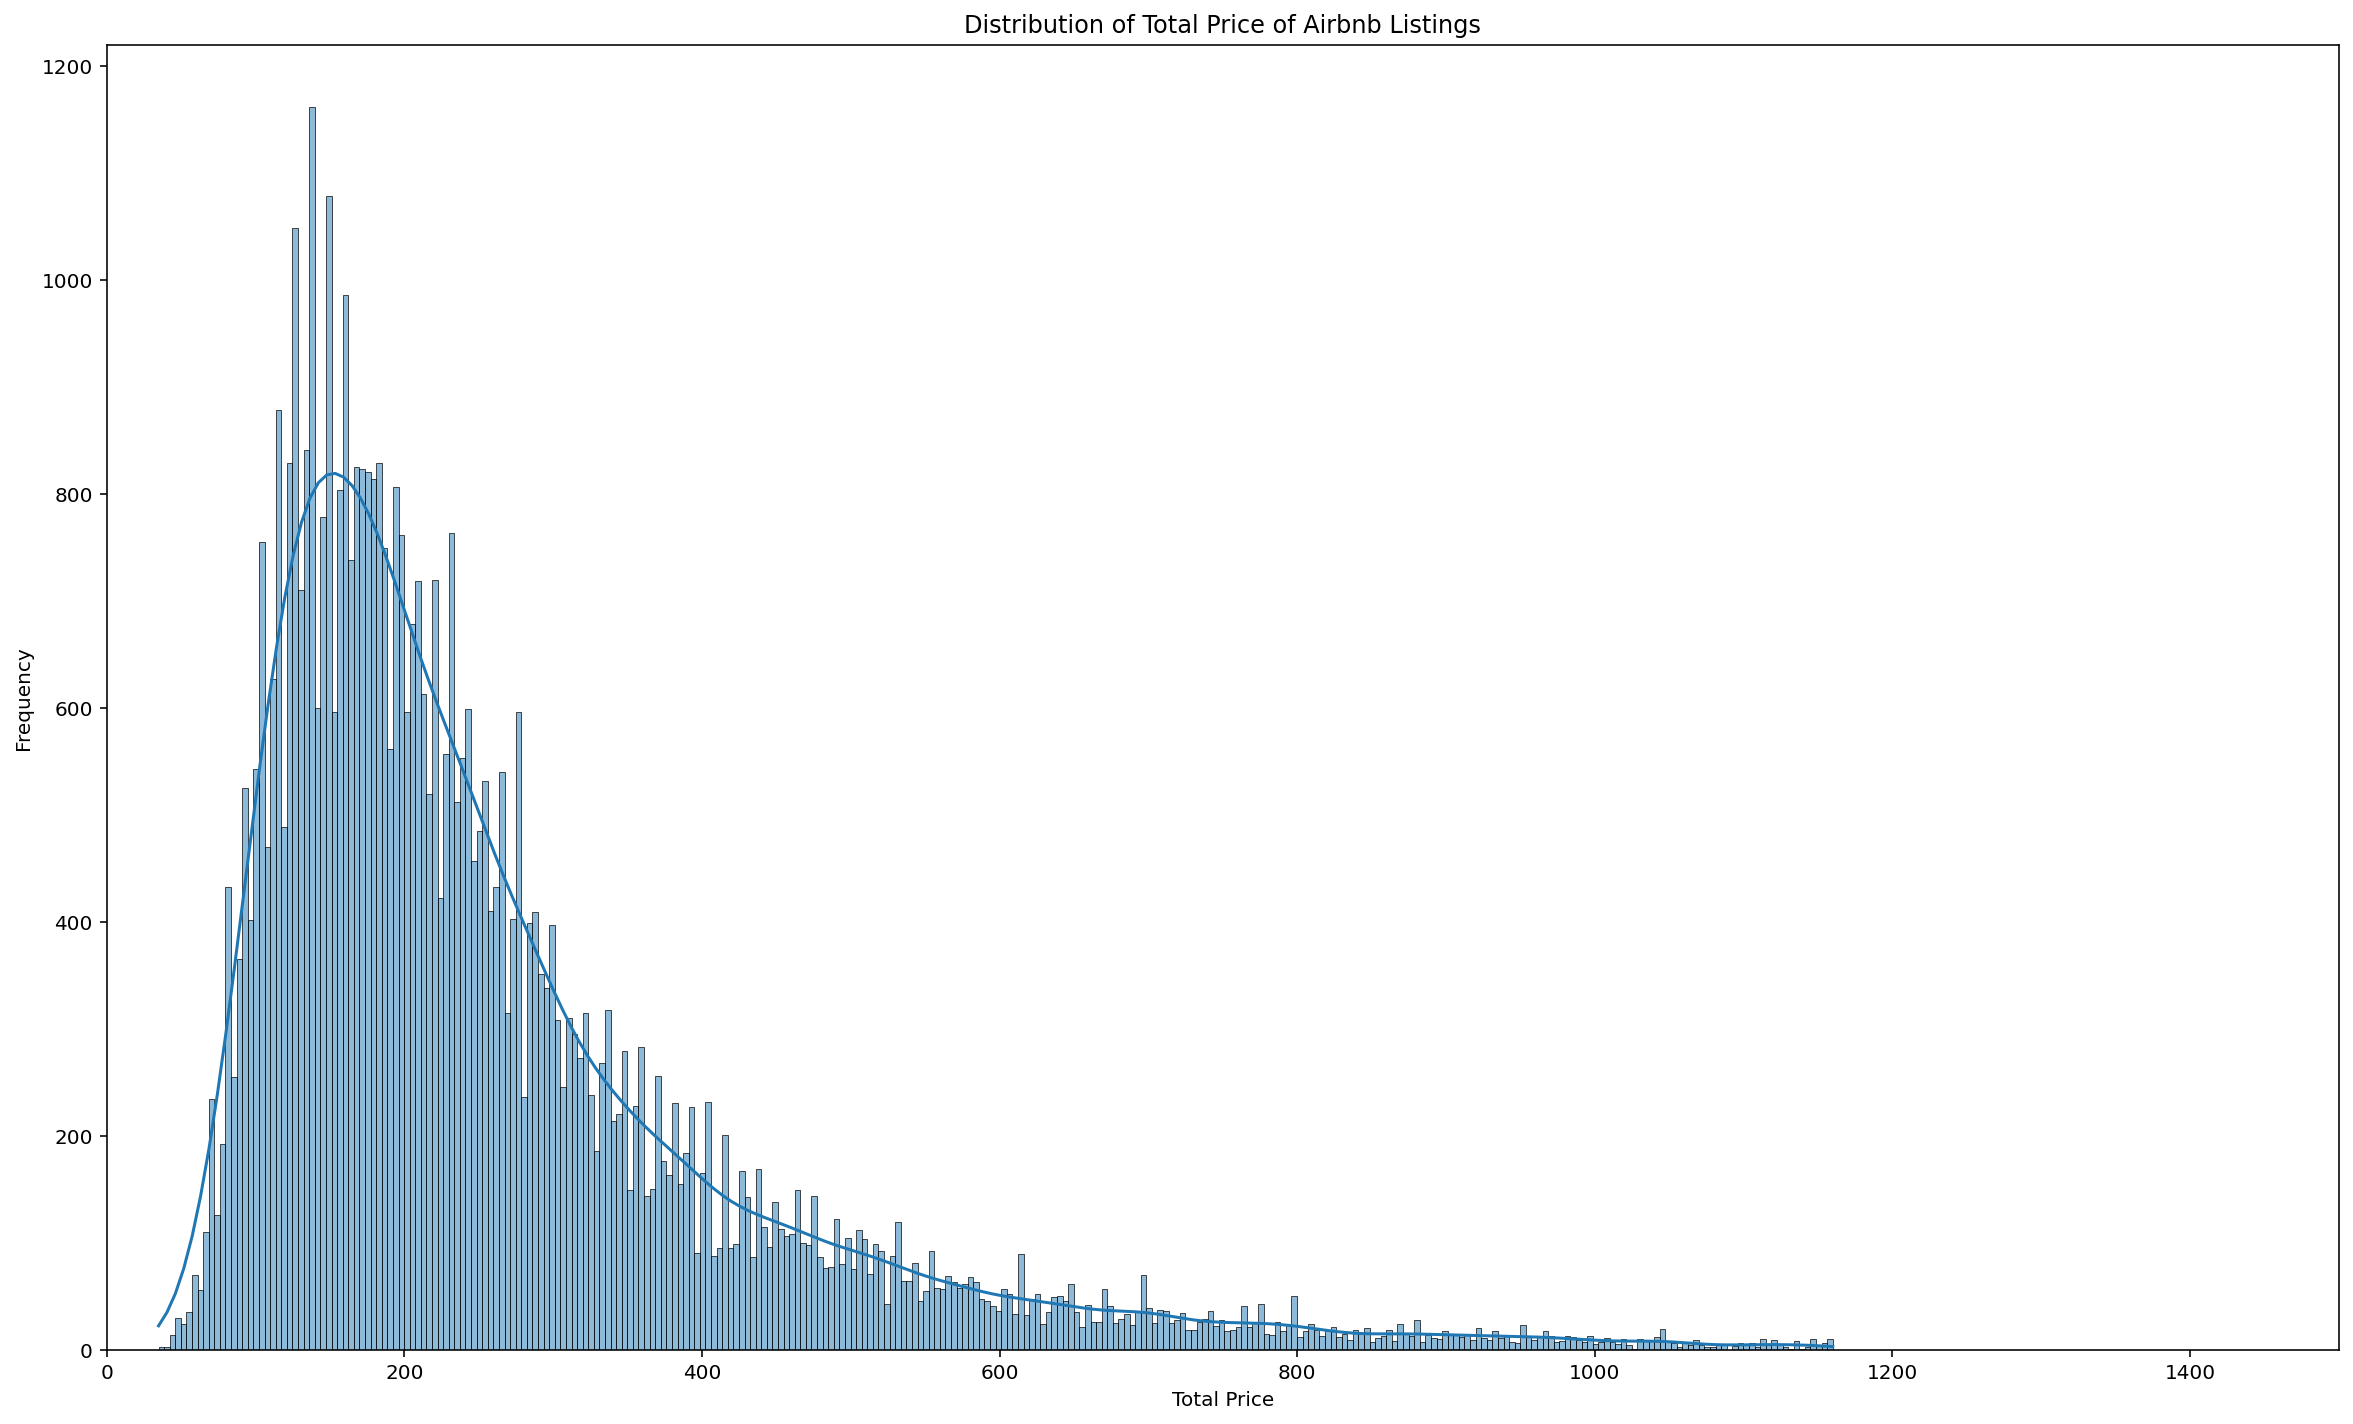

In [45]:
# With the long tail :
# plt.figure(figsize=(10, 6))
# sns.histplot(df['realSum'], bins=50, kde=True)
# plt.title('Distribution of Total Price of Airbnb Listings')
# plt.xlabel('Total Price')
# plt.ylabel('Frequency')
# plt.show()

plt.figure(figsize=(20, 12))
sns.histplot(df['realSum'], bins=300, kde=True)
plt.title('Distribution of Total Price of Airbnb Listings')
plt.xlabel('Total Price')
plt.ylabel('Frequency')
plt.xlim(0, 1500)
plt.savefig('histogram_distribution_prices.png')
plt.show()

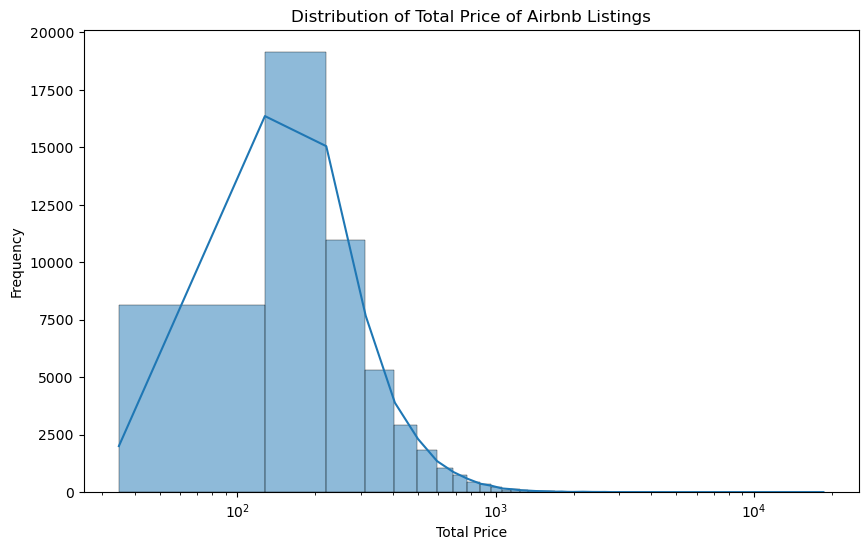

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(df['realSum'], bins=200, kde=True)
plt.title('Distribution of Total Price of Airbnb Listings')
plt.xlabel('Total Price')
plt.xscale('log')
plt.ylabel('Frequency')
plt.show()


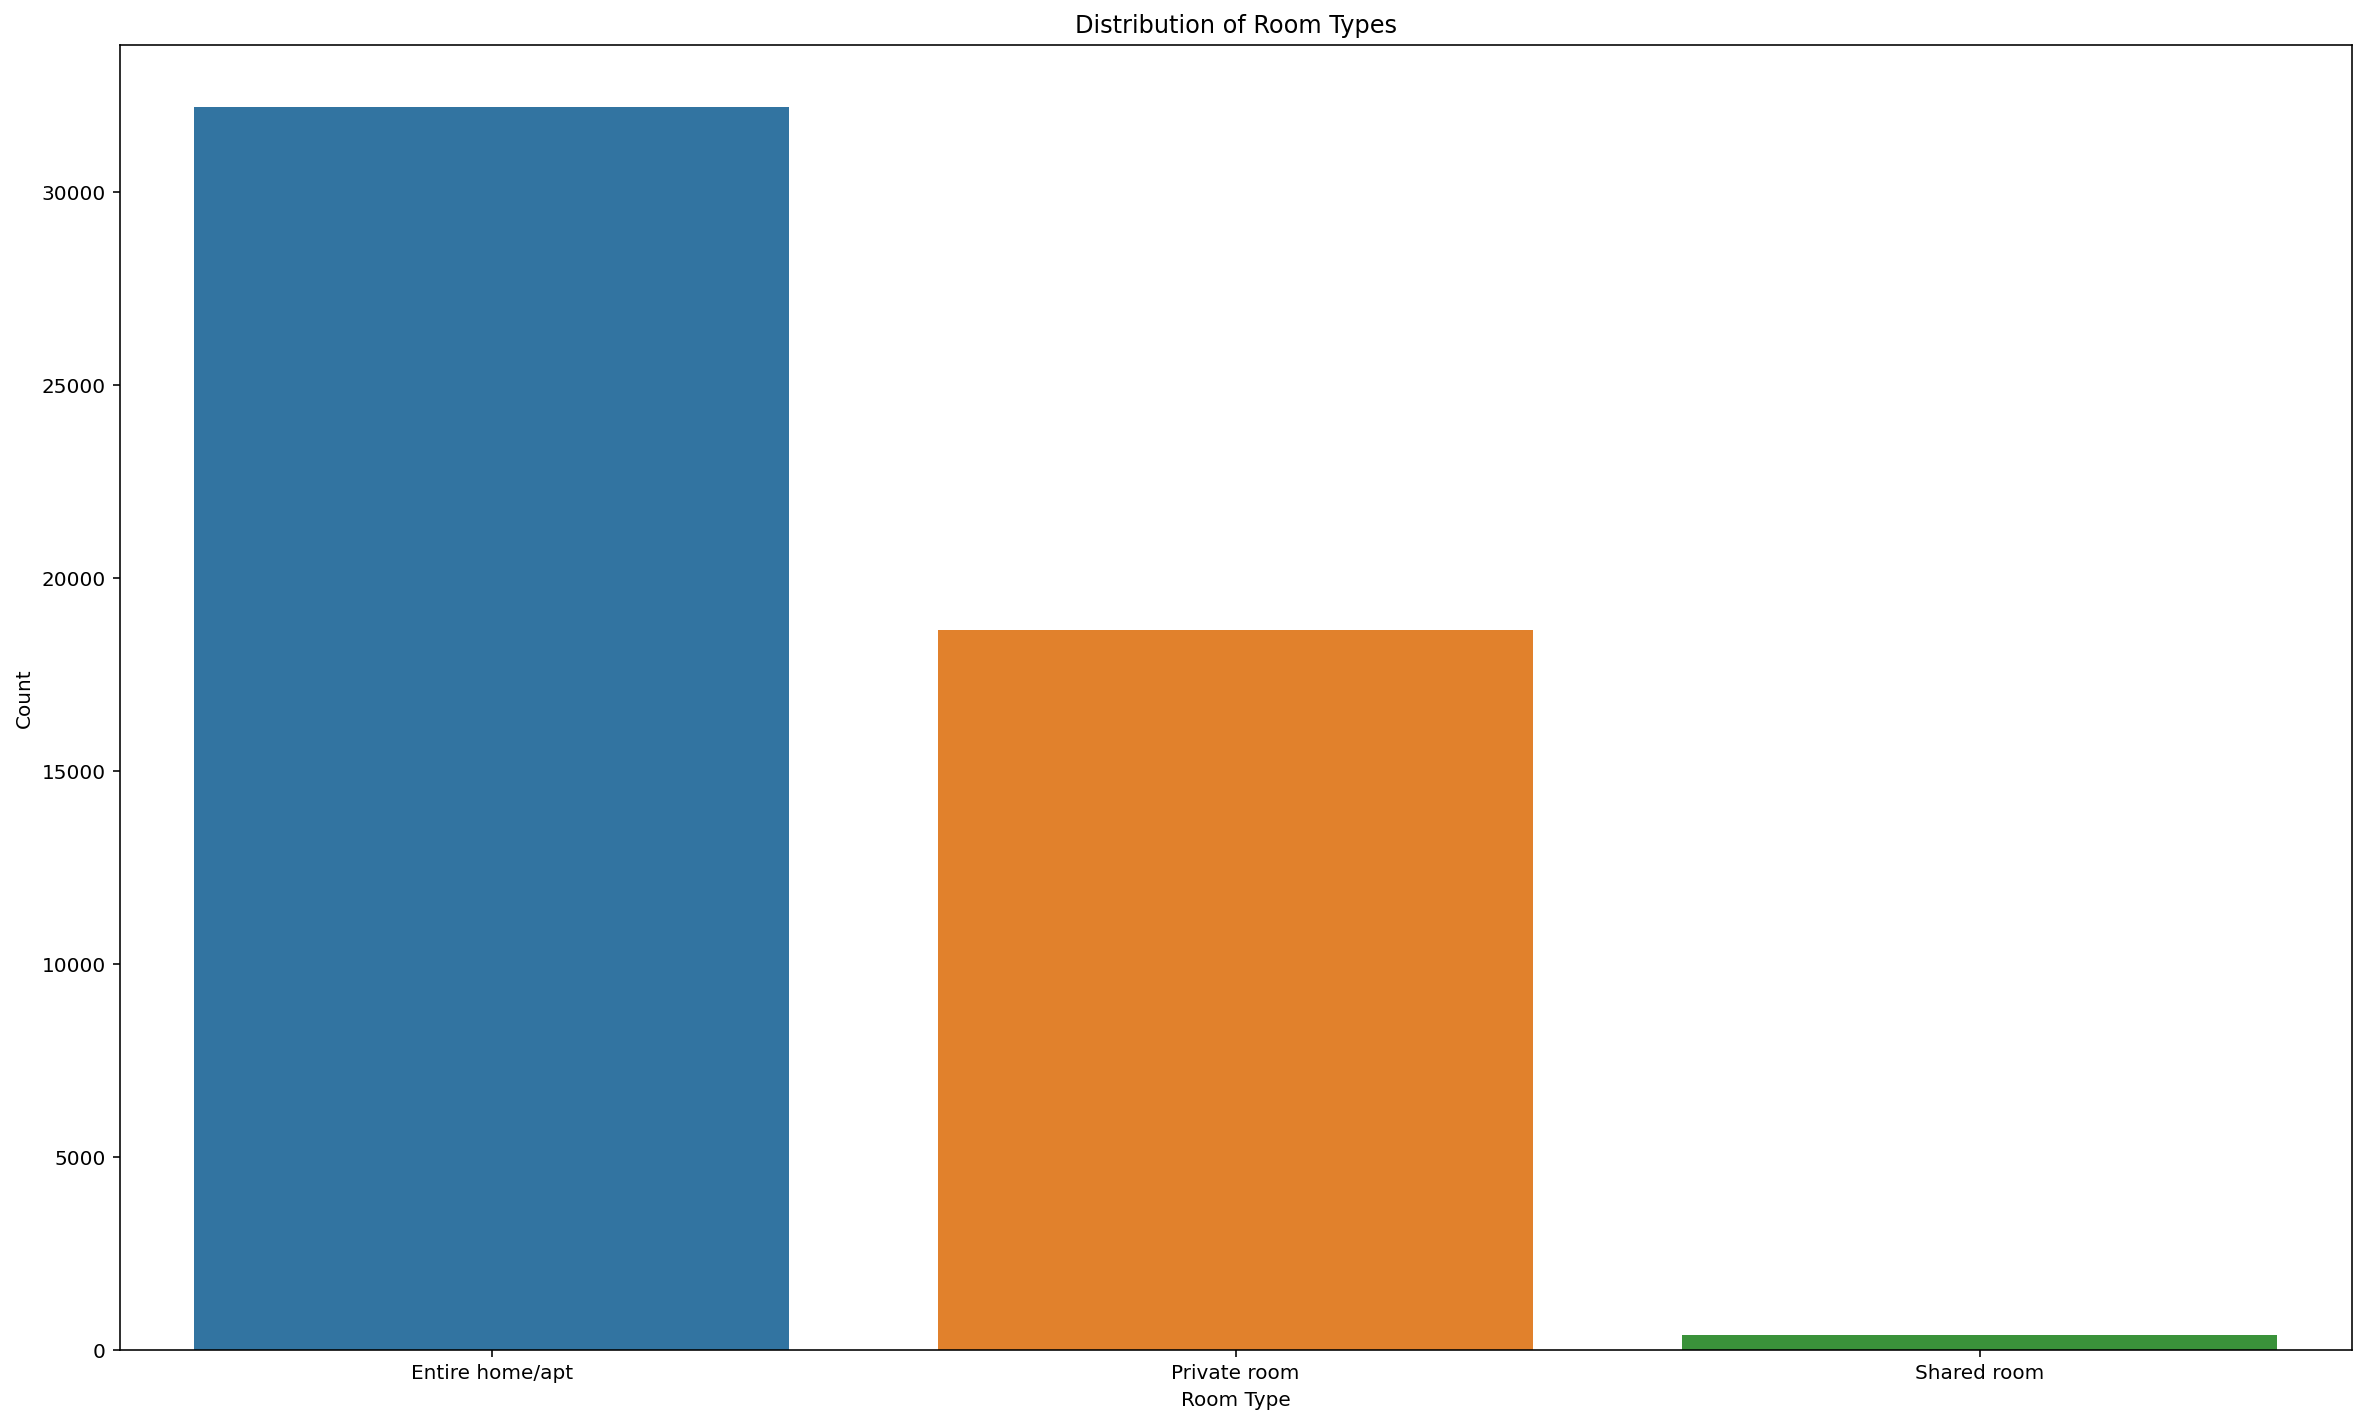

In [46]:
plt.figure(figsize=(20, 12))
sns.countplot(x='room_type', data=df, order=df['room_type'].value_counts().index)
plt.title('Distribution of Room Types')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.savefig('room_types_countplot.png')
plt.show()


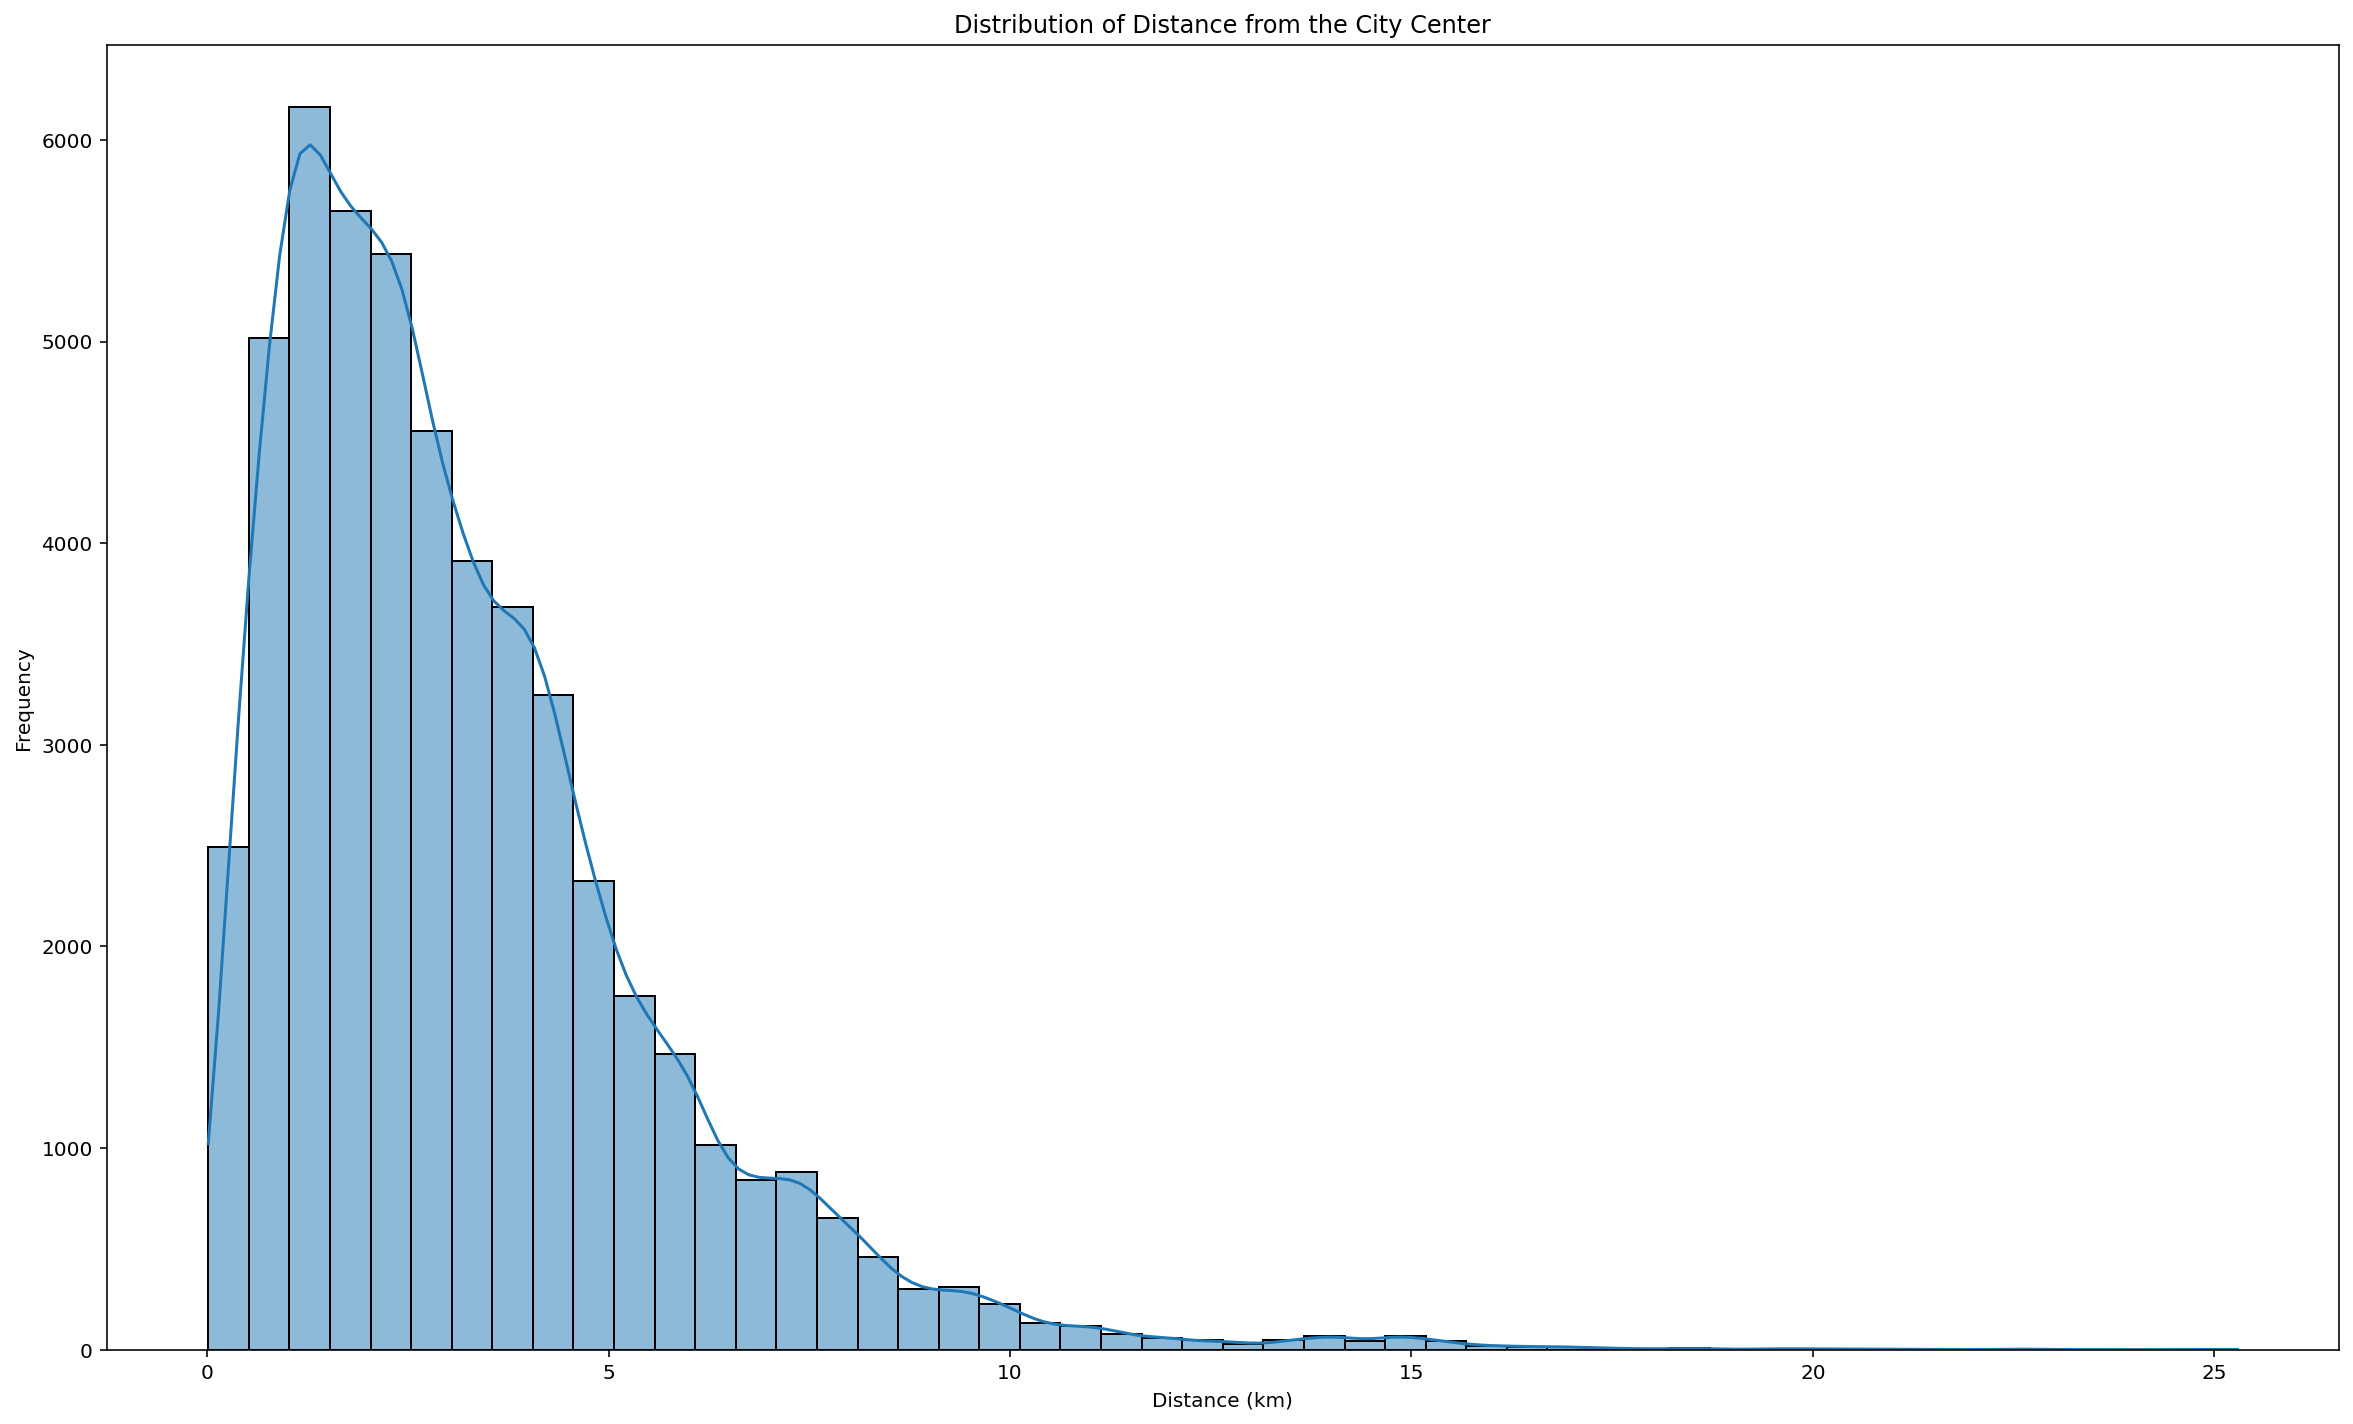

In [47]:
plt.figure(figsize=(20, 12))
sns.histplot(df['dist'], bins=50, kde=True)
plt.title('Distribution of Distance from the City Center')
plt.xlabel('Distance (km)')
plt.ylabel('Frequency')
plt.savefig('histogram_distribution_distance.png')
plt.show()

C:\Users\Kelyan\AppData\Local\Temp\ipykernel_23580\2807890855.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='city', y='realSum', hue='time', data=sorted_df, ci=None)


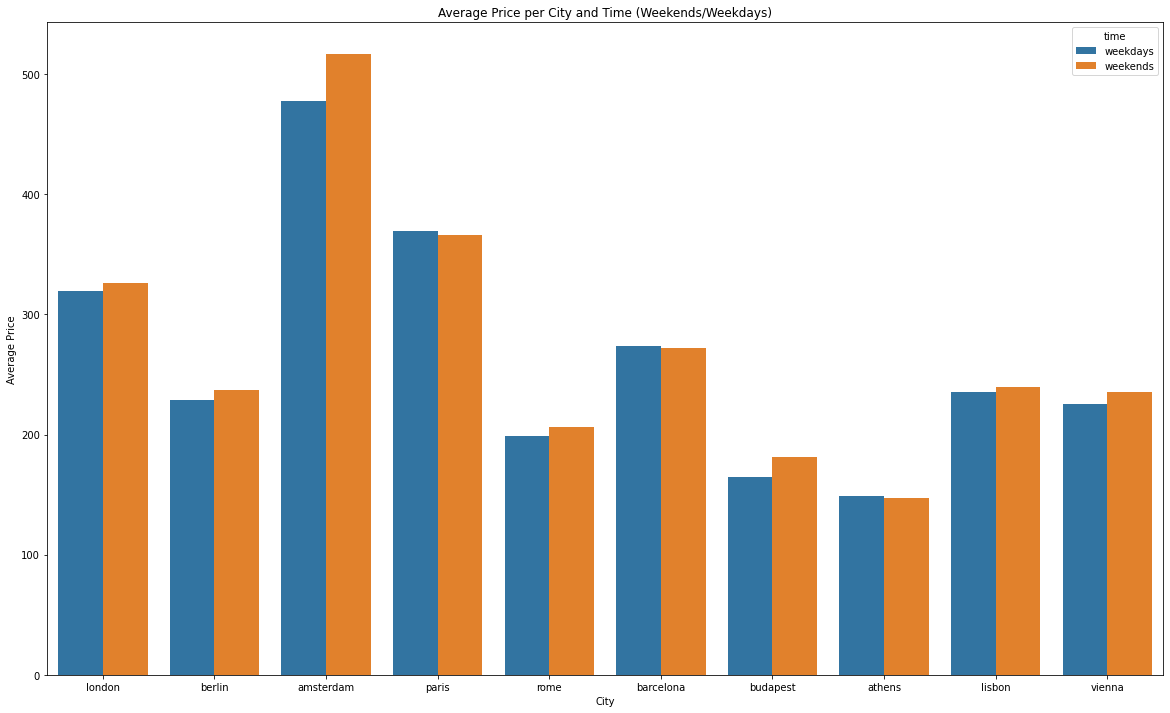

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sort the DataFrame by 'realSum' in descending order
sorted_df = df.sort_values(by='realSum', ascending=False)

# Create the bar plot with the sorted DataFrame
plt.figure(figsize=(20, 12))
sns.barplot(x='city', y='realSum', hue='time', data=sorted_df, ci=None)
plt.title('Average Price per City and Time (Weekends/Weekdays)')
plt.xlabel('City')
plt.ylabel('Average Price')
plt.show()


C:\Users\Kelyan\AppData\Local\Temp\ipykernel_23580\1954050604.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='city', y='realSum', hue='time', data=df, ci=None, order= df.groupby('city')['realSum'].mean().sort_values(ascending=False).index)


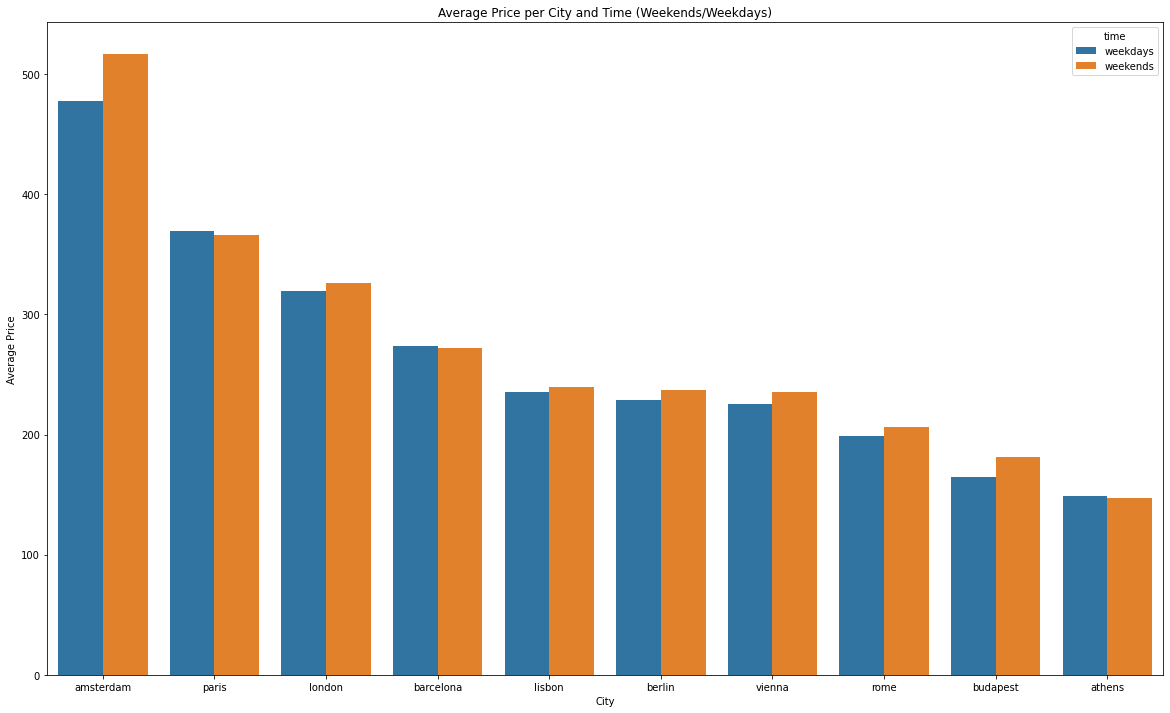

In [35]:
plt.figure(figsize=(20, 12))
sns.barplot(x='city', y='realSum', hue='time', data=df, ci=None, order= df.groupby('city')['realSum'].mean().sort_values(ascending=False).index)
plt.title('Average Price per City and Time (Weekends/Weekdays)')
plt.xlabel('City')
plt.ylabel('Average Price')
plt.show()

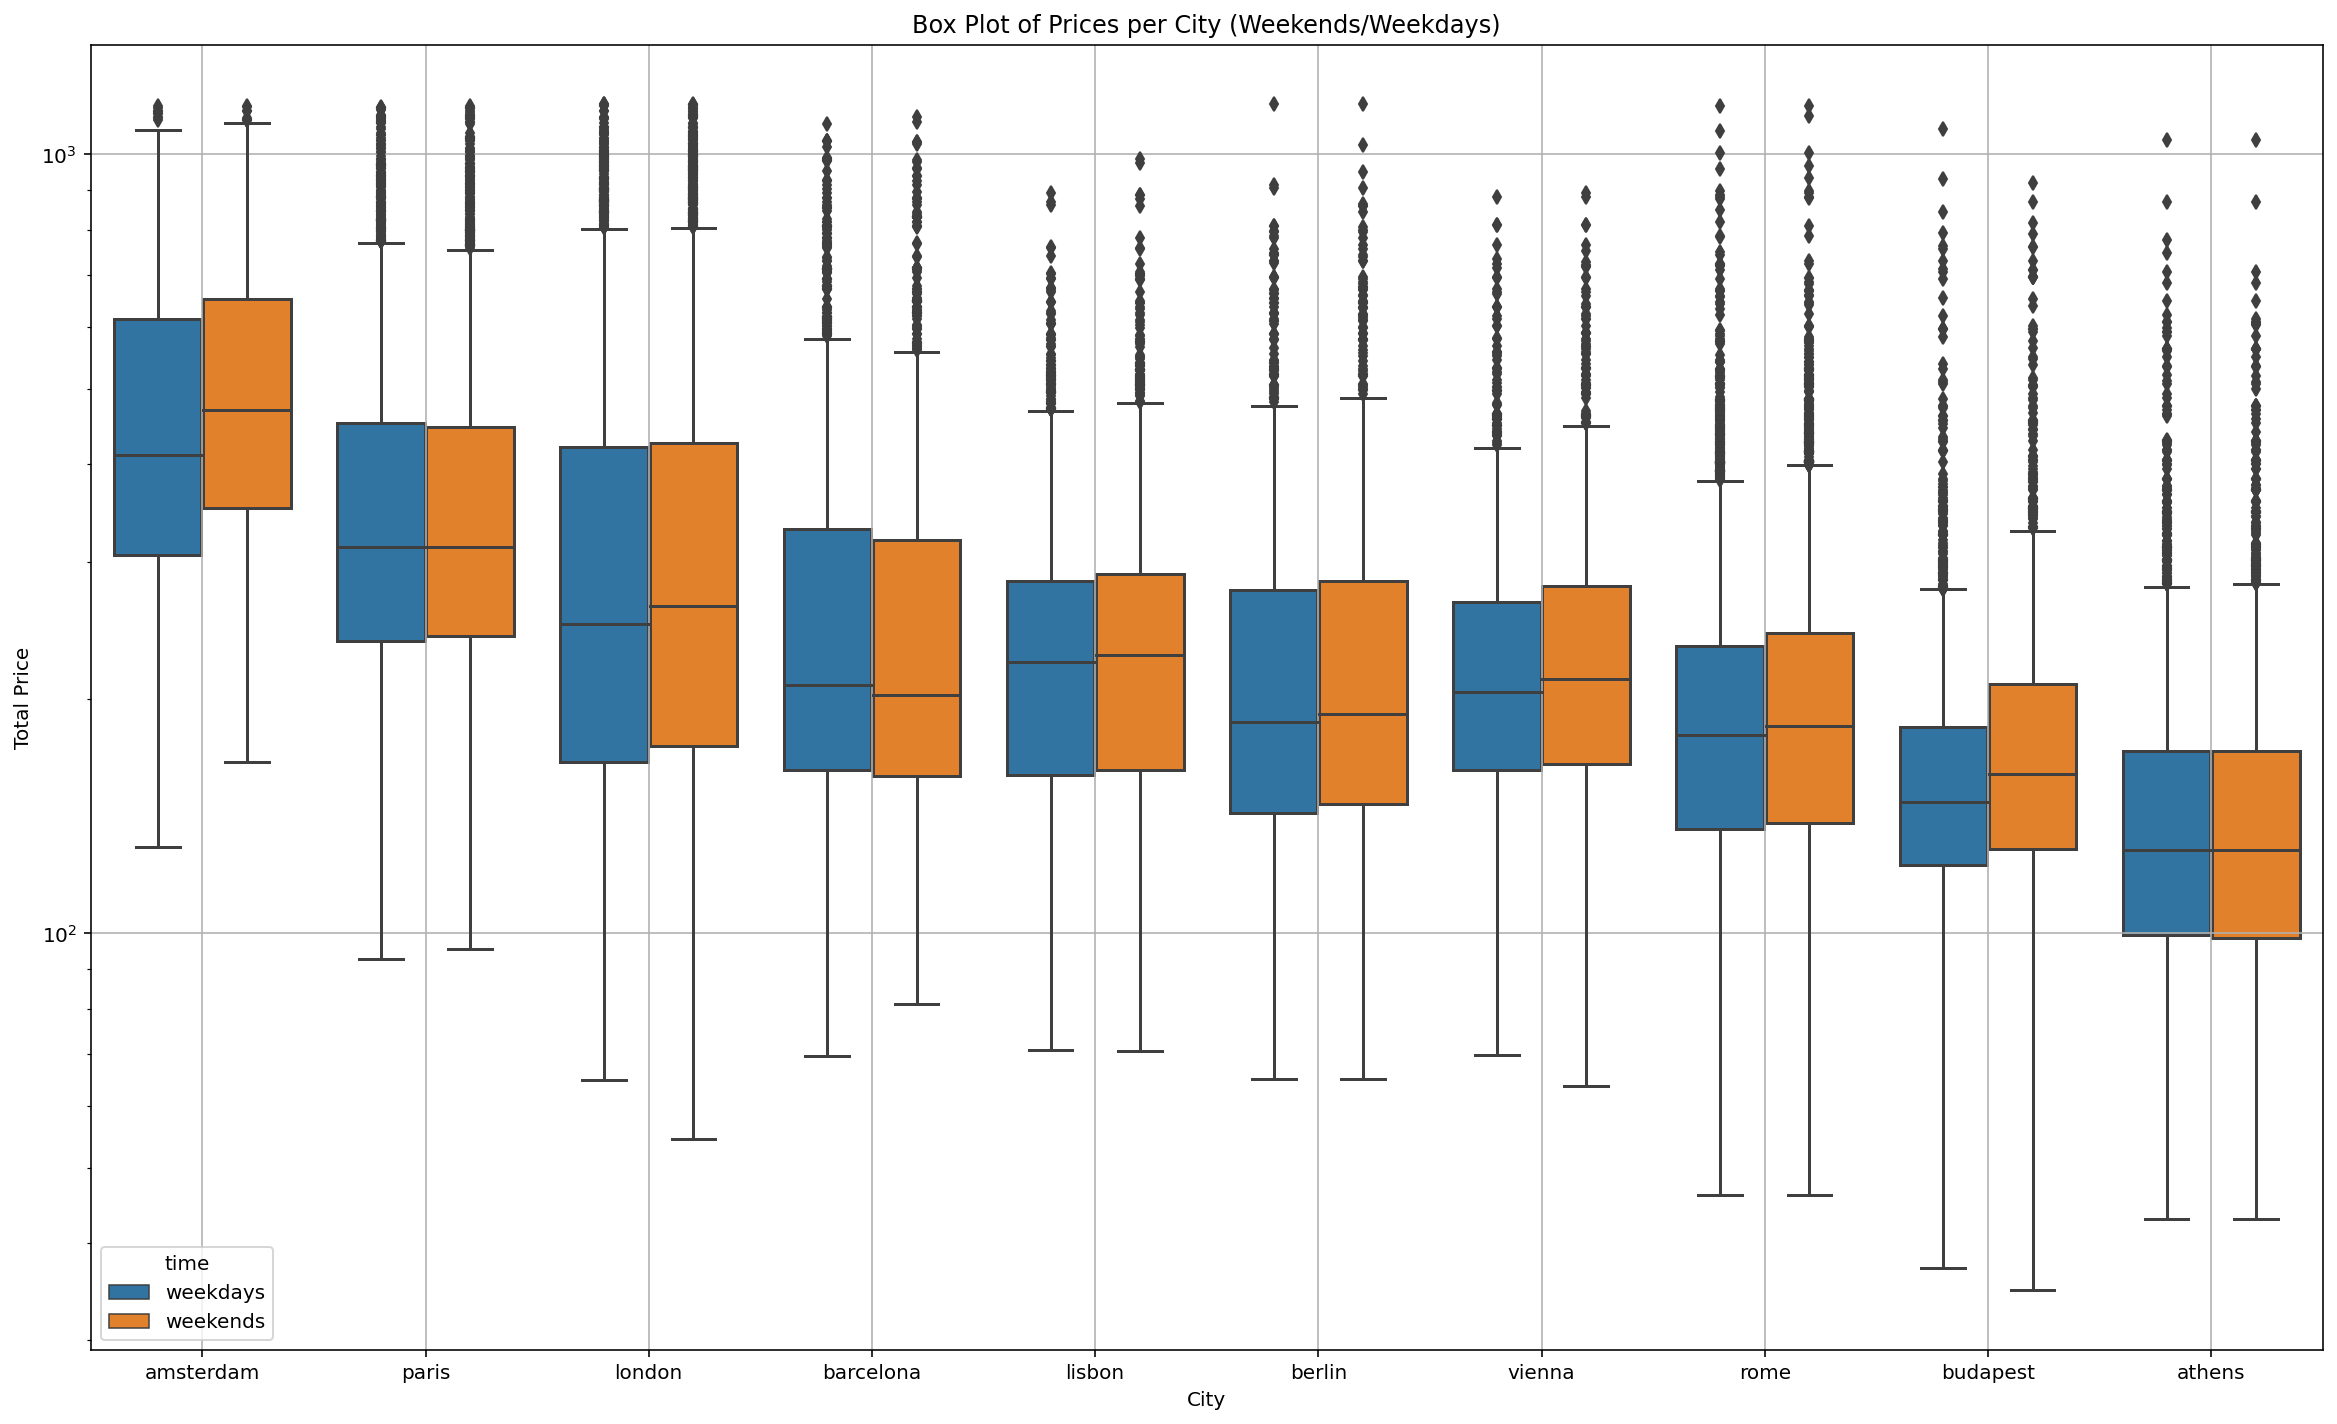

In [44]:
plt.figure(figsize=(20, 12))
sns.boxplot(x='city', y='realSum', hue='time', data=df, order= df.groupby('city')['realSum'].mean().sort_values(ascending=False).index)
plt.title('Box Plot of Prices per City (Weekends/Weekdays)')
plt.xlabel('City')
plt.ylabel('Total Price')
plt.yscale('log')
plt.grid()
plt.savefig('boxplot_prices_per_city.png')
plt.show()


C:\Users\Kelyan\AppData\Local\Temp\ipykernel_23580\757199906.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='city', y='cleanliness_rating', data=df, ci=None)


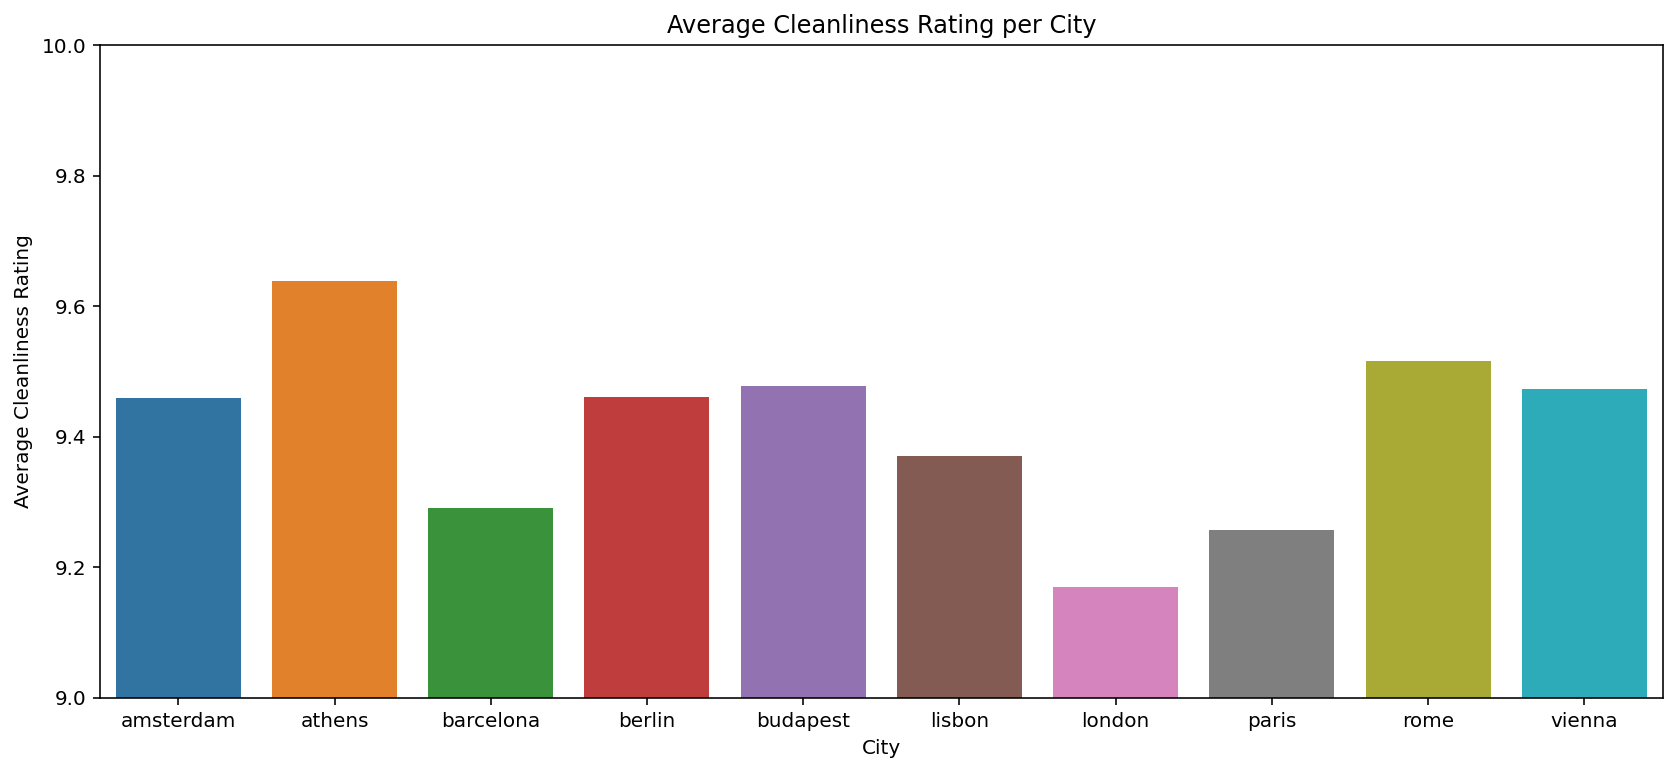

In [50]:
plt.figure(figsize=(14, 6))
sns.barplot(x='city', y='cleanliness_rating', data=df, ci=None)
plt.title('Average Cleanliness Rating per City')
plt.xlabel('City')
plt.ylabel('Average Cleanliness Rating')
plt.ylim(9, 10)
plt.show()

C:\Users\Kelyan\AppData\Local\Temp\ipykernel_10648\3525552612.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='city', y='guest_satisfaction_overall', data=df, ci=None)


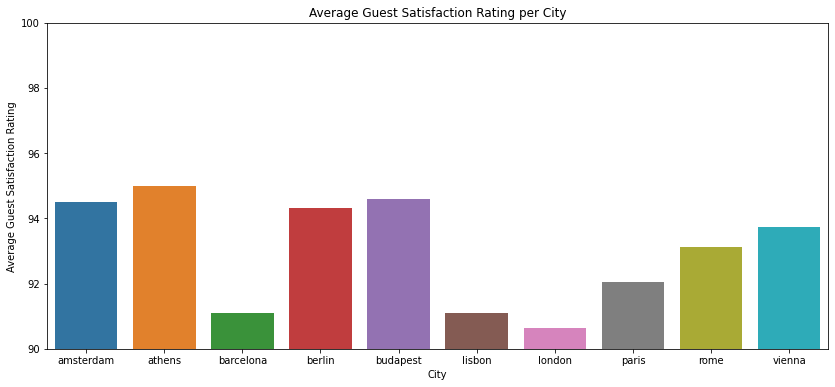

In [31]:
plt.figure(figsize=(14, 6))
sns.barplot(x='city', y='guest_satisfaction_overall', data=df, ci=None)
plt.title('Average Guest Satisfaction Rating per City')
plt.xlabel('City')
plt.ylabel('Average Guest Satisfaction Rating')
plt.ylim(90, 100)
plt.show()


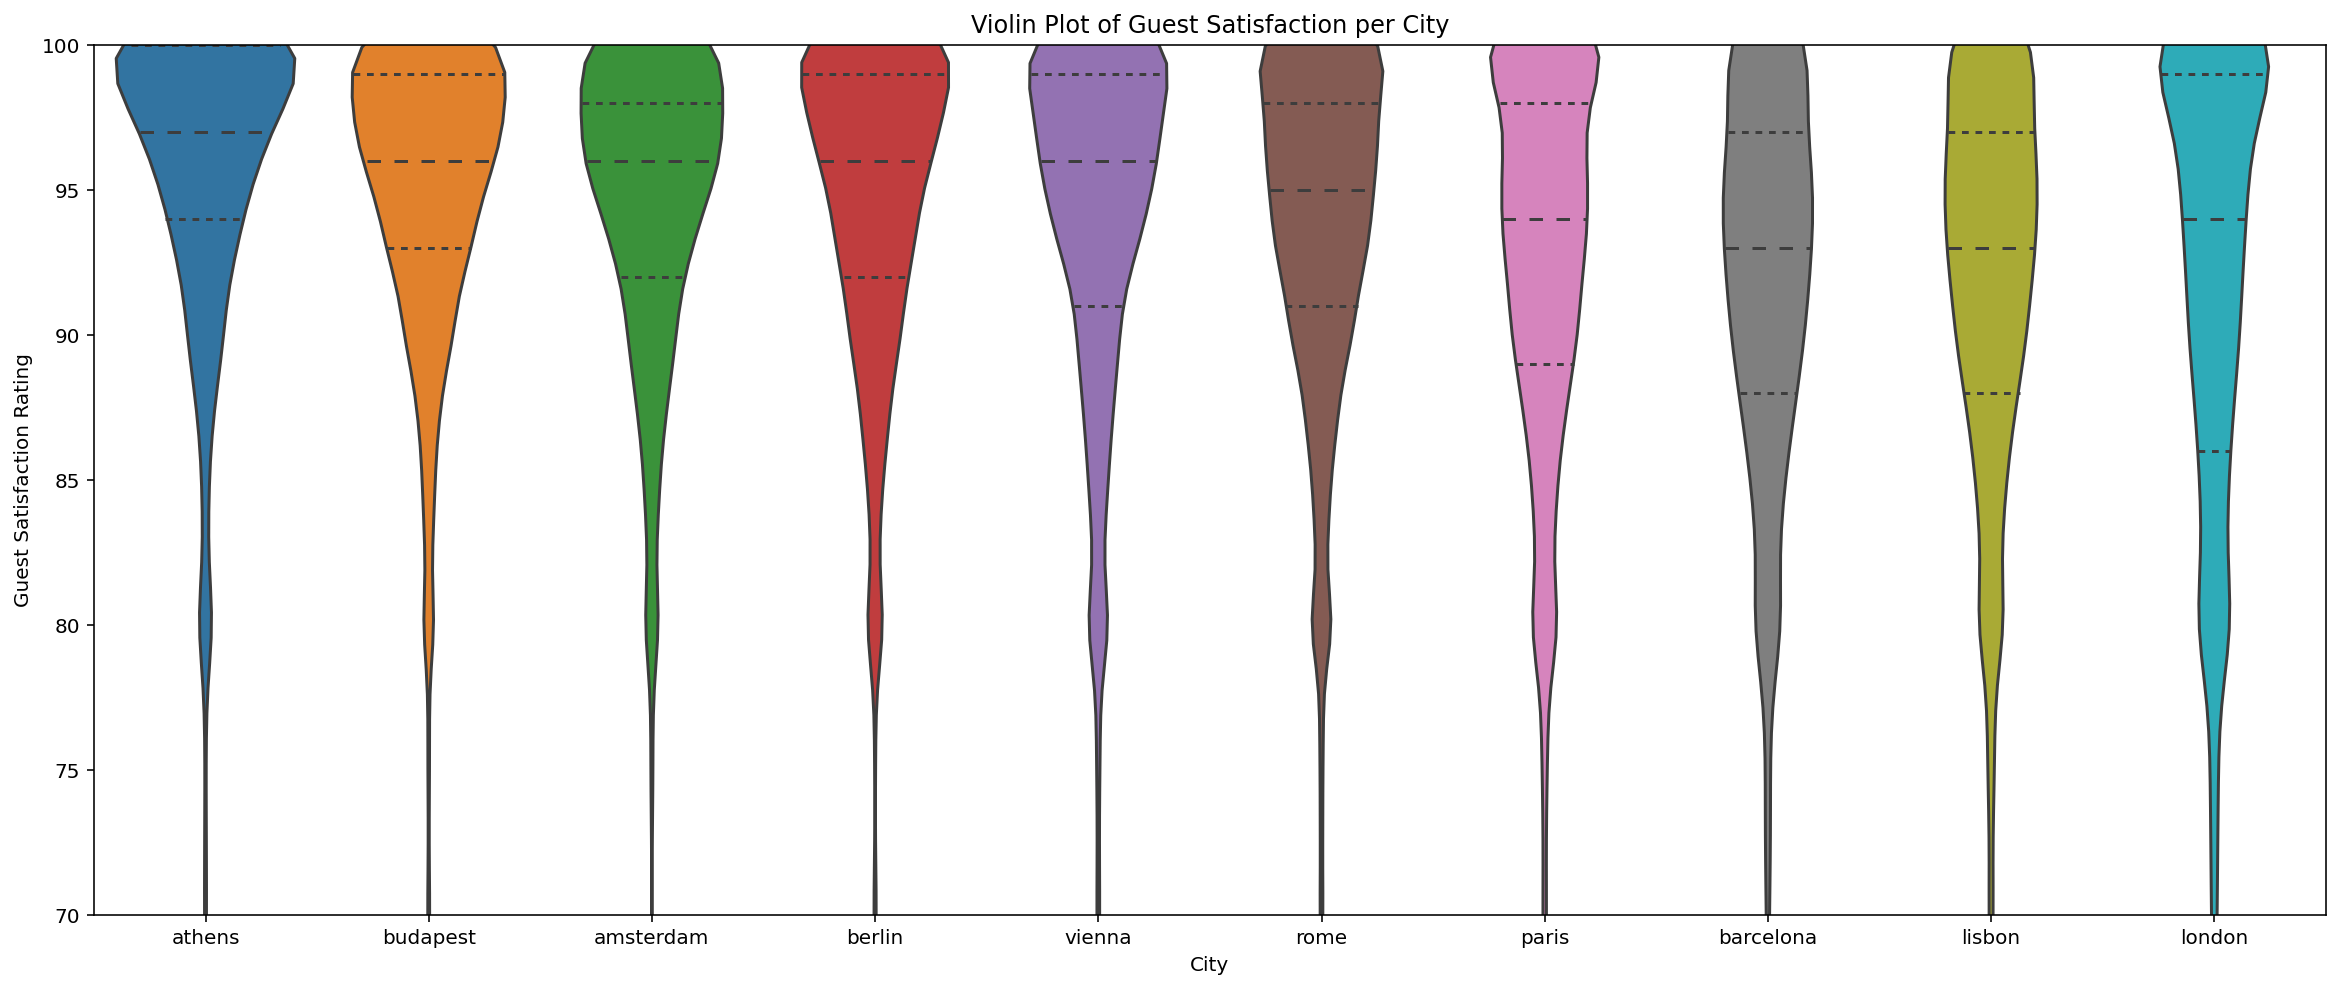

In [53]:
plt.figure(figsize=(20, 8))
sns.violinplot(x='city', y='guest_satisfaction_overall', data=df, inner='quartile', order= df.groupby('city')['guest_satisfaction_overall'].mean().sort_values(ascending=False).index)
plt.title('Violin Plot of Guest Satisfaction per City')
plt.xlabel('City')
plt.ylabel('Guest Satisfaction Rating')
plt.ylim(70, 100)
plt.savefig('violinplot_guest_satisfaction.png')
plt.show()

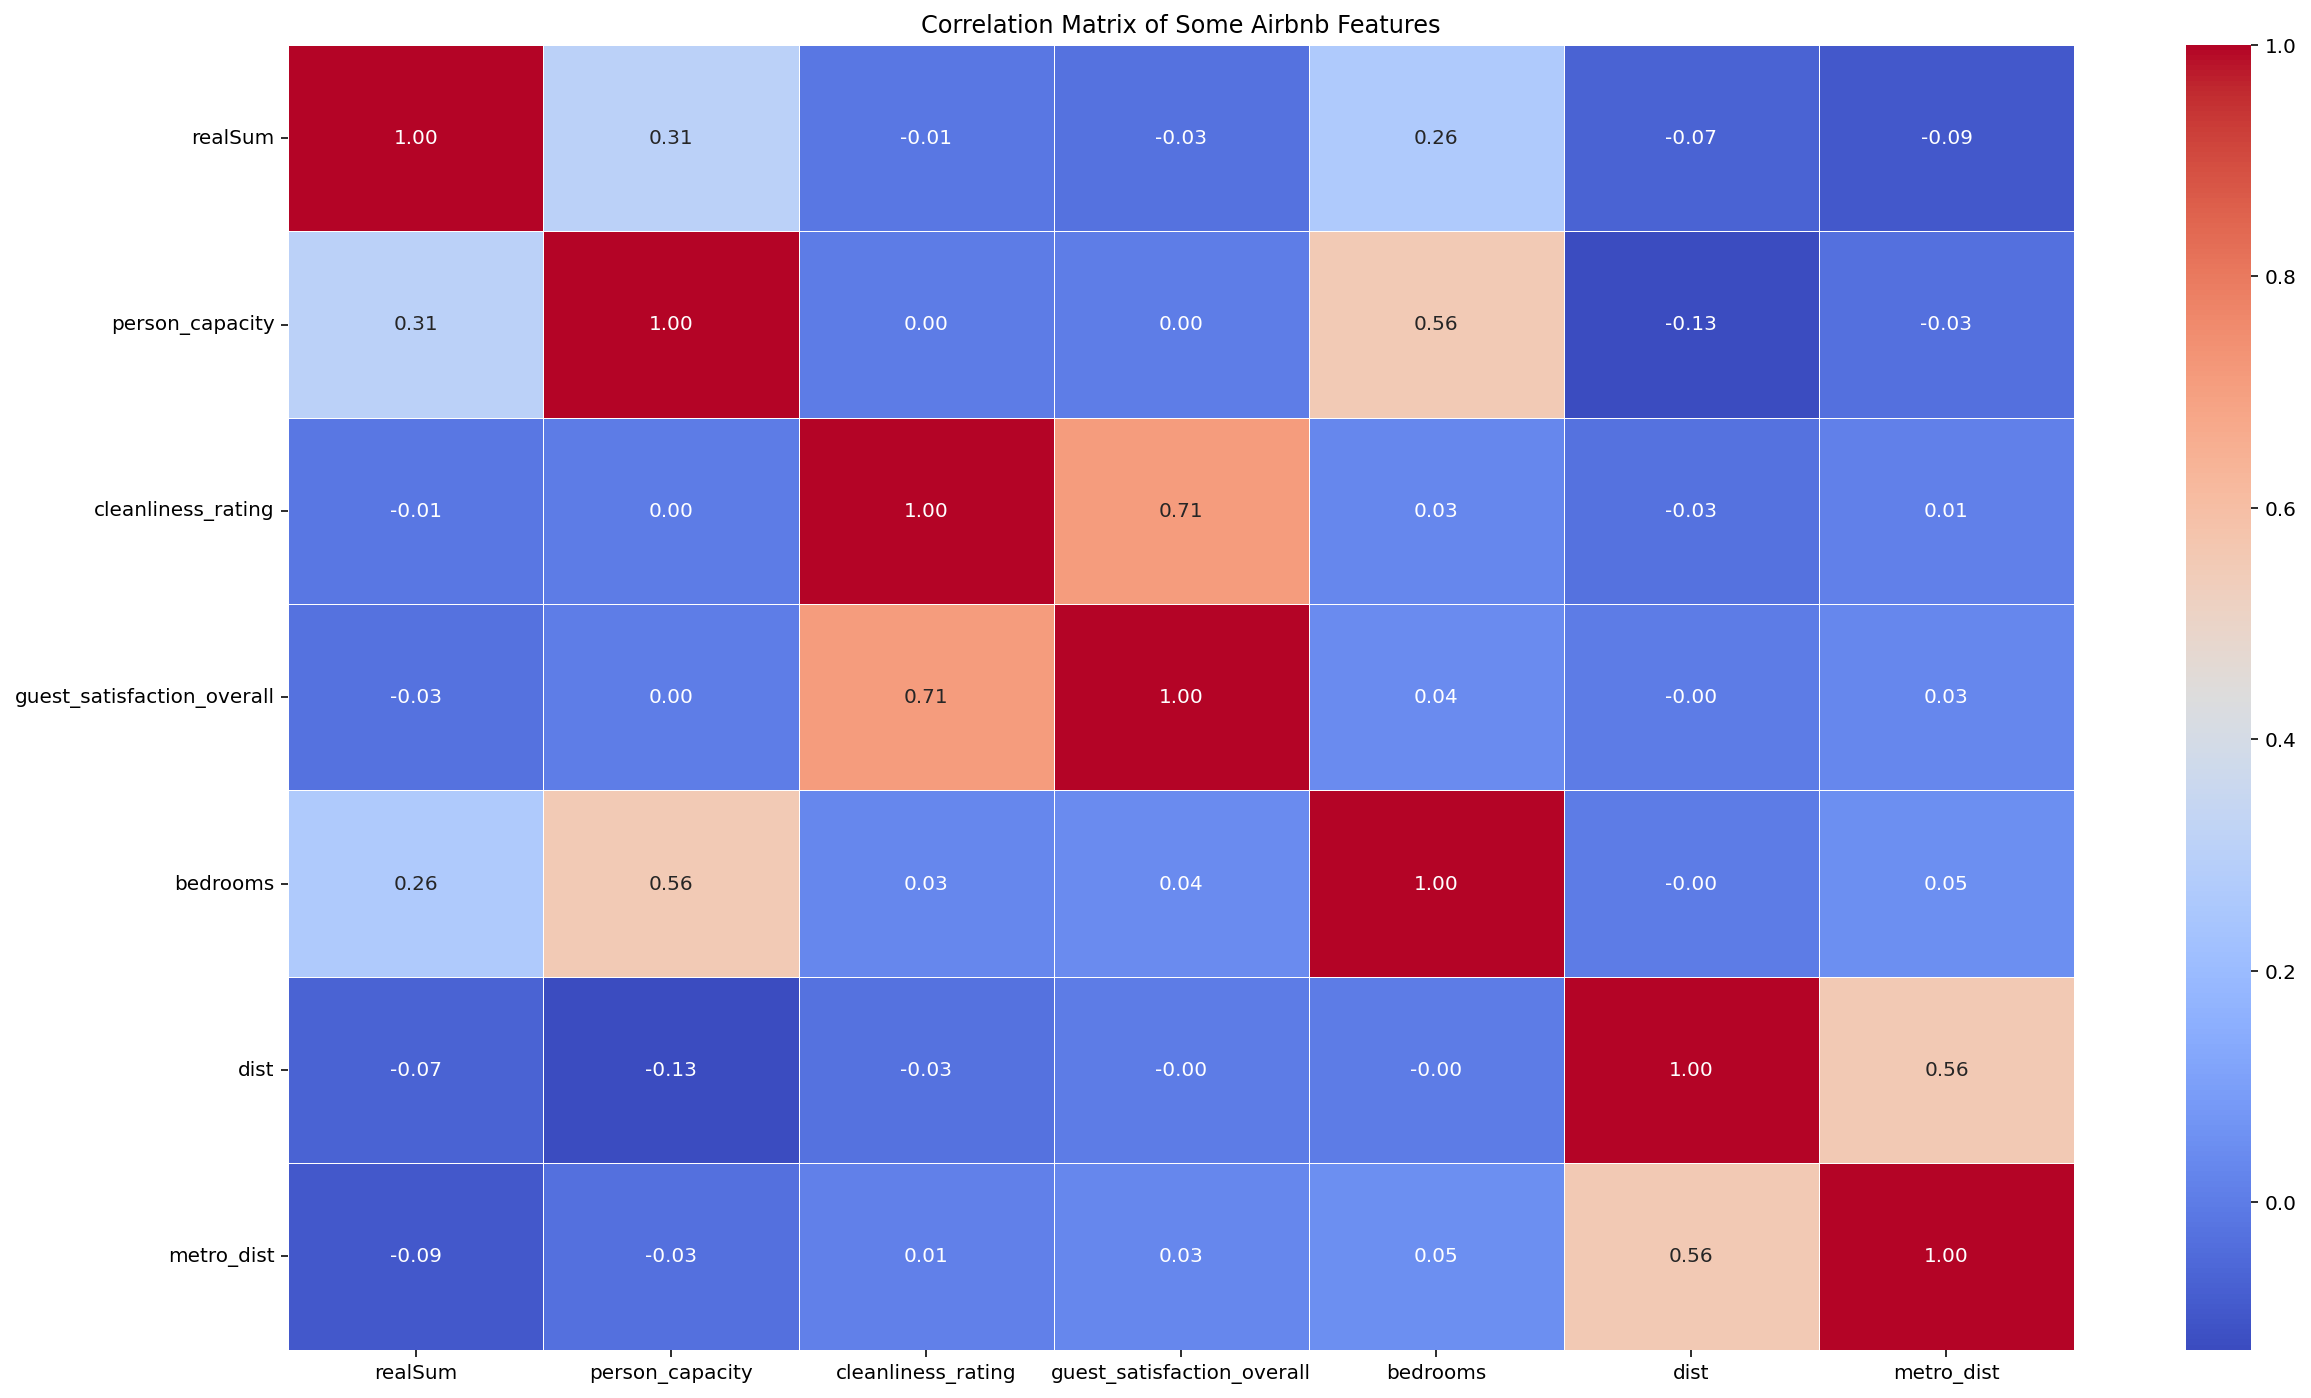

In [55]:
# Select columns for the correlation matrix
corr_columns = ['realSum', 'person_capacity', 'cleanliness_rating', 'guest_satisfaction_overall', 'bedrooms', 'dist', 'metro_dist']

# Compute the correlation matrix
corr = df[corr_columns].corr()

# Create a heatmap
plt.figure(figsize=(20, 12))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix of Some Airbnb Features')
plt.savefig('correlation_matrix.png')
plt.show()

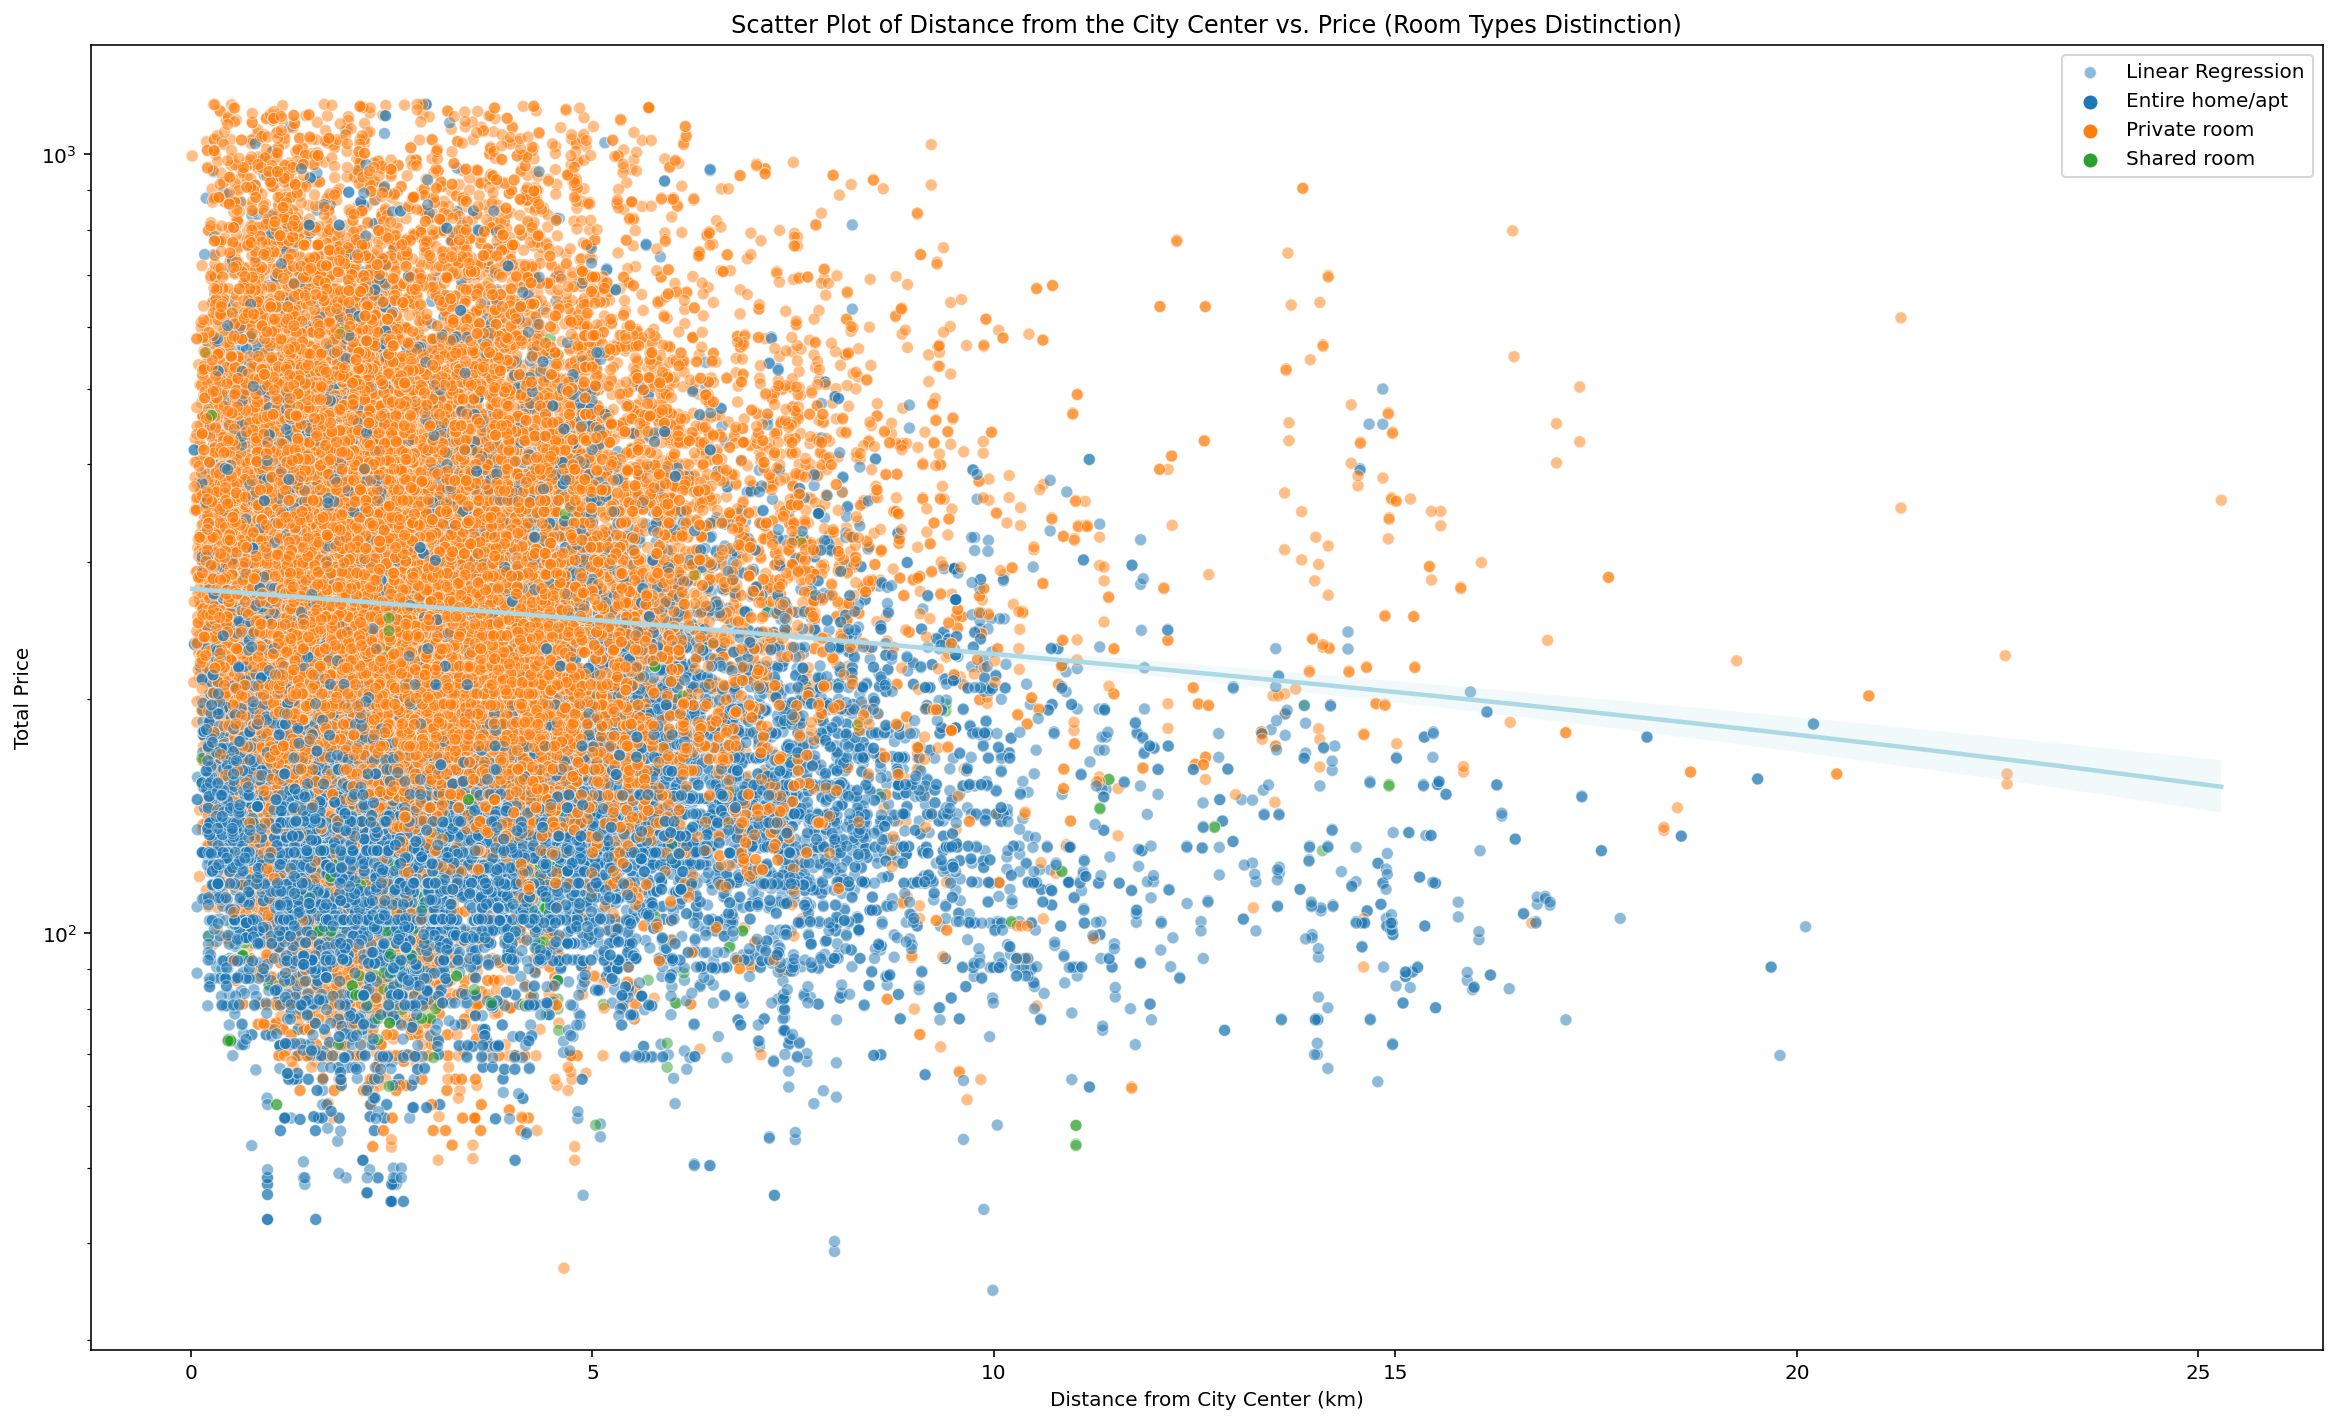

In [62]:
plt.figure(figsize=(20, 12))
sns.scatterplot(x='dist', y='realSum', hue='room_type', data=df, alpha=0.5)
plt.title('Scatter Plot of Distance from the City Center vs. Price (Room Types Distinction)')
# plot linear regression line between 'dist' and 'realSum'
sns.regplot(x='dist', y='realSum', data=df, scatter=False, color="lightblue")
# add regression line label in the legend
plt.legend(labels=['Linear Regression', 'Entire home/apt', 'Private room', 'Shared room'])
plt.xlabel('Distance from City Center (km)')
plt.ylabel('Total Price')
plt.yscale('log')
plt.savefig('scatterplot_distance_price.png')
plt.show()

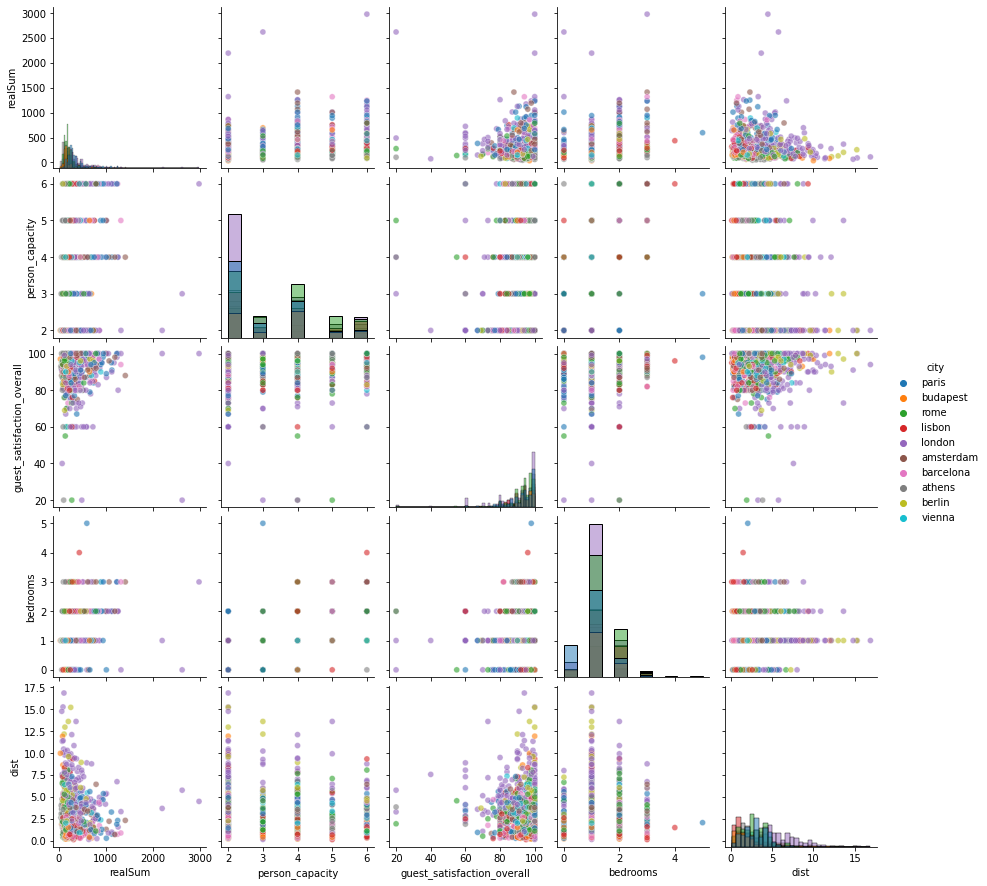

In [49]:
# Select columns for the pair plot
pair_columns = ['realSum', 'person_capacity', 'guest_satisfaction_overall', 'bedrooms', 'dist']
pair_df = df[pair_columns + ['city']].sample(1000)  # Sample 1000 rows to speed up plotting

# Create a pair plot
sns.pairplot(pair_df, hue='city', diag_kind='hist', plot_kws={'alpha': 0.6})
plt.show()

# More complex EDA

## Compare cities prices with same type of room

In [53]:
def filter_data(df, room_type, person_capacity, min_rating, max_rating, max_dist_from_center):
    filtered_data = df[(df['room_type'] == room_type) &
                       (df['person_capacity'] == person_capacity) &
                       (df['guest_satisfaction_overall'] >= min_rating) &
                       (df['guest_satisfaction_overall'] <= max_rating) &
                       (df['dist'] <= max_dist_from_center)]
    return filtered_data


In [59]:
filtered_df = filter_data(df,
                          room_type='Private room',
                          person_capacity=2,
                          min_rating=85,
                          max_rating=95,
                          max_dist_from_center=5)


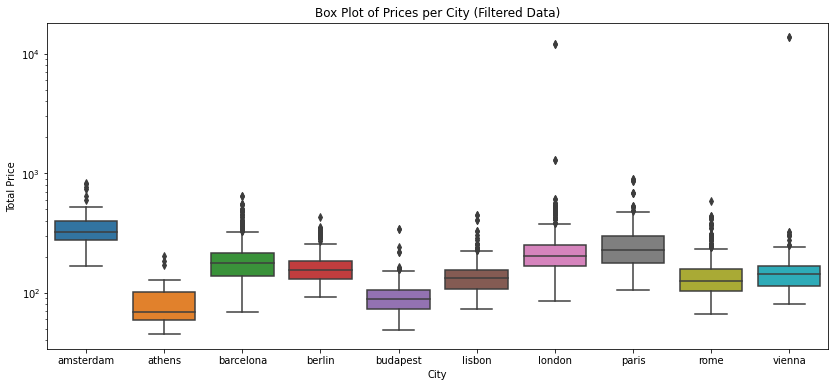

In [62]:
plt.figure(figsize=(14, 6))
sns.boxplot(x='city', y='realSum', data=filtered_df)
plt.title('Box Plot of Prices per City (Filtered Data)')
plt.xlabel('City')
plt.ylabel('Total Price')
plt.yscale('log')
plt.show()

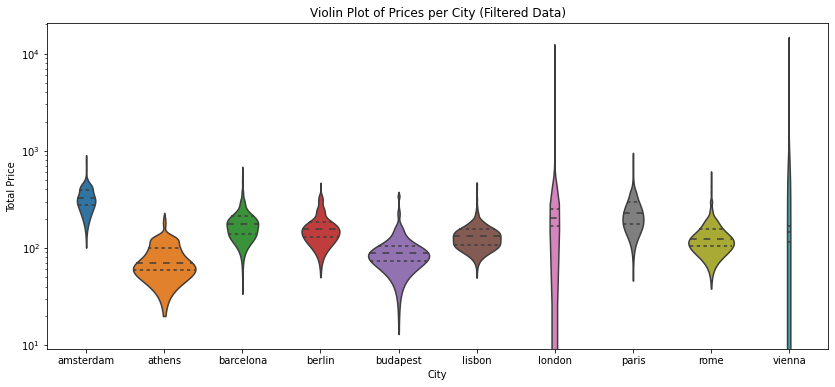

In [63]:
plt.figure(figsize=(14, 6))
sns.violinplot(x='city', y='realSum', data=filtered_df, inner='quartile')
plt.title('Violin Plot of Prices per City (Filtered Data)')
plt.xlabel('City')
plt.ylabel('Total Price')
plt.yscale('log')
plt.show()

C:\Users\Kelyan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\categorical.py:3540: UserWarning: 88.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Kelyan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\categorical.py:3540: UserWarning: 87.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Kelyan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\categorical.py:3540: UserWarning: 96.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Kelyan\AppData\Local\Package

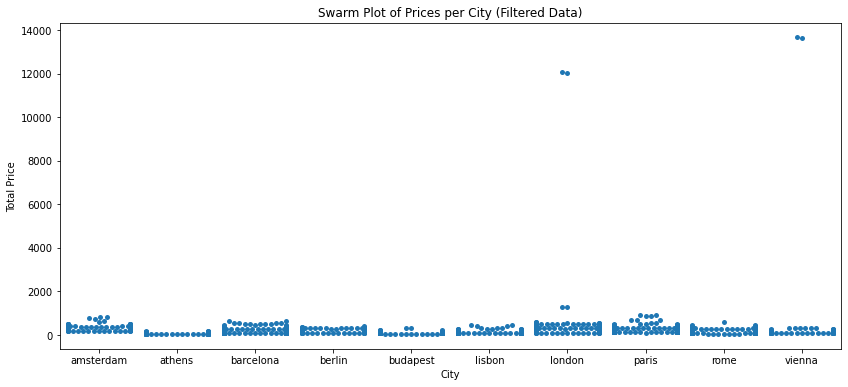

In [64]:
plt.figure(figsize=(14, 6))
sns.swarmplot(x='city', y='realSum', data=filtered_df, size=5)
plt.title('Swarm Plot of Prices per City (Filtered Data)')
plt.xlabel('City')
plt.ylabel('Total Price')
plt.show()